In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib import figure

# Importing the dataset
Below we import & clean up the top 50 songs of 2019 using pandas:

In [101]:
movies = pd.read_csv("movie_metadata.csv")
movies = movies.rename(columns={"director_name": "Director", "director_facebook_likes": "Director FB Likes", 
                                "gross": "Gross", "imdb_score": 'IMDB', "movie_facebook_likes": 'Movie FB Likes', 
                                "budget": 'Budget', "title_year": 'Year', 'movie_title' : "Title",
                                'num_user_for_reviews': 'Number User Reviews', "country": "Country",
                                "cast_total_facebook_likes": "Total Cast FB Likes", "genres" : "Genres",
                                "num_critic_for_reviews": "Number Critic Reviews", 'duration' :'Duration',
                                "language": "Language", "color": "Color"})

movies = movies.drop(columns= {"facenumber_in_poster", "content_rating", 
                               "aspect_ratio", "actor_1_name", "actor_2_name", "actor_3_facebook_likes", 
                               "actor_1_facebook_likes", "actor_2_facebook_likes", "plot_keywords", 
                               "num_voted_users", "actor_3_name", "movie_imdb_link"})

movies.head()

,Color,Director,Number Critic Reviews,Duration,Director FB Likes,Gross,Genres,Title,Total Cast FB Likes,Number User Reviews,Language,Country,Budget,Year,IMDB,Movie FB Likes
0,Color,James Cameron,723.0,178.0,0.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,4834,3054.0,English,USA,237000000.0,2009.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,48350,1238.0,English,USA,300000000.0,2007.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,200074175.0,Action|Adventure|Thriller,Spectre,11700,994.0,English,UK,245000000.0,2015.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,448130642.0,Action|Thriller,The Dark Knight Rises,106759,2701.0,English,USA,250000000.0,2012.0,8.5,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,143,NaN,NaN,NaN,NaN,NaN,7.1,0


# Using seaborn

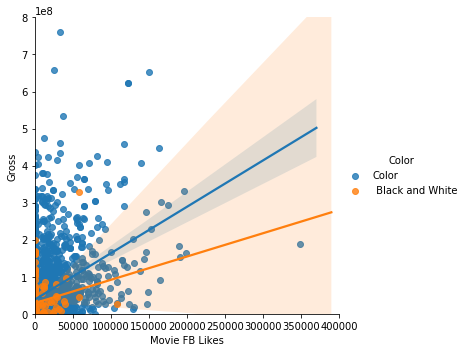

In [105]:
ax = sns.lmplot(x='Movie FB Likes', y='Gross',  data=movies, hue = "Color")
ax.set(xlim = (0, 400000))
ax.set(ylim = (0, 800000000))
plt.title;

In [106]:
budget = movies.sort_values('Budget', ascending=False)

In [107]:
popular_genres = movies.groupby('Genre').agg(np.mean).sort_values('Popularity', ascending=False)

NameError: name 'top50' is not defined

In [6]:
popular_artists = top50.groupby('Artist').count().sort_values('Popularity', ascending=False)
top10artists = popular_artists.iloc[0:10]
top10artists = top10artists.index

In [7]:
top10 = top50[top50['Artist'].isin(top10artists)]
top10

,Track Name,Artist,Genre,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95
13,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
16,LA CANCIÓN,J Balvin,latin,176,65,75,-6,11,43,243,15,32,90
17,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,90,48,76,-6,7,91,158,56,5,91


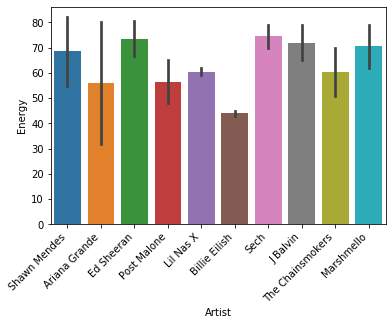

In [8]:
energy = sns.barplot(x='Artist', y='Energy', data=top10)
energy.set_xticklabels(energy.get_xticklabels(), rotation=45, horizontalalignment='right');
# plt.setp(pop.get_xticklabels(), rotation=45)

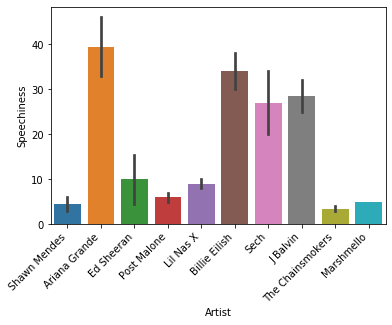

In [9]:
pop = sns.barplot(x='Artist', y='Speechiness', data=top10)
pop.set_xticklabels(pop.get_xticklabels(), rotation=45, horizontalalignment='right');